With Preprocessed_EEG

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.io as sio

In [3]:

file_path = 'E:/STUDY/Publications/Thesis/Brain Emotion Detection/Dataset/Practice with datasets/Seed/Preprocessed_EEG/2_20140404.mat'

mat_data = sio.loadmat(file_path)


In [3]:
#Explore Variable Names

variable_names = mat_data.keys()
print(variable_names)


dict_keys(['__header__', '__version__', '__globals__', 'jl_eeg1', 'jl_eeg2', 'jl_eeg3', 'jl_eeg4', 'jl_eeg5', 'jl_eeg6', 'jl_eeg7', 'jl_eeg8', 'jl_eeg9', 'jl_eeg10', 'jl_eeg11', 'jl_eeg12', 'jl_eeg13', 'jl_eeg14', 'jl_eeg15'])


In [23]:
print(mat_data['__header__'])
print(mat_data['__version__'])
print(mat_data['__globals__'])

b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Sat Apr 05 19:54:42 2014'
1.0
[]


In [5]:
for trial_index in range(1, 16):  # Assuming trial indices are from 1 to 15
    # Replace 'djc_eeg1' with the corresponding variable name containing EEG data for each trial
    variable_name = f'jl_eeg{trial_index}'
    eeg_data = mat_data[variable_name]

    # Print the shape of the EEG data for this trial
    print(f"Shape of EEG data for trial {trial_index}: {eeg_data.shape}")

Shape of EEG data for trial 1: (62, 47001)
Shape of EEG data for trial 2: (62, 46601)
Shape of EEG data for trial 3: (62, 41201)
Shape of EEG data for trial 4: (62, 47601)
Shape of EEG data for trial 5: (62, 37001)
Shape of EEG data for trial 6: (62, 39001)
Shape of EEG data for trial 7: (62, 47401)
Shape of EEG data for trial 8: (62, 43201)
Shape of EEG data for trial 9: (62, 53001)
Shape of EEG data for trial 10: (62, 47401)
Shape of EEG data for trial 11: (62, 47001)
Shape of EEG data for trial 12: (62, 46601)
Shape of EEG data for trial 13: (62, 47001)
Shape of EEG data for trial 14: (62, 47601)
Shape of EEG data for trial 15: (62, 41201)


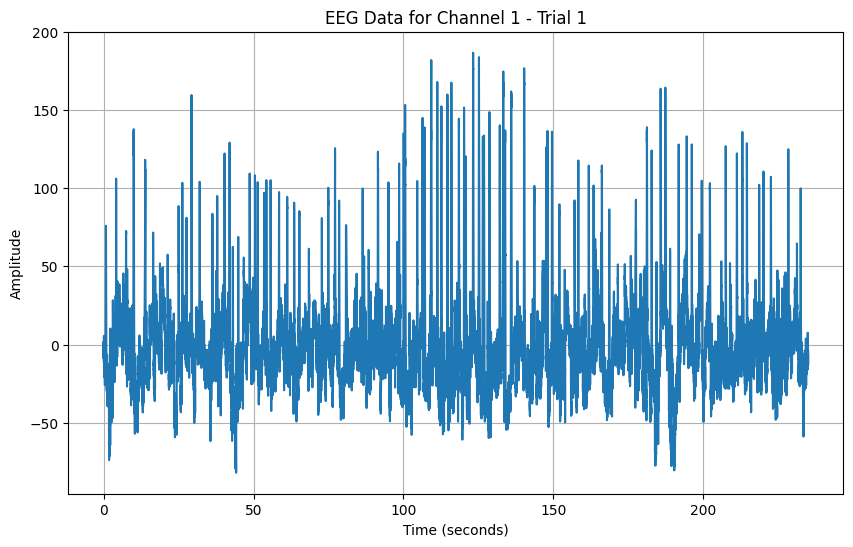

In [7]:
# Choose the channel index for plotting (0 for the first channel, 1 for the second channel, and so on)
channel_index = 0
eeg_trial_data = mat_data['jl_eeg1']
# Get the EEG data for the chosen channel
eeg_channel_data = eeg_trial_data[channel_index, :]

# Create a time vector for the x-axis (assuming a sampling rate of 200 Hz as mentioned in the dataset description)
sampling_rate = 200
time_vector = np.arange(len(eeg_channel_data)) / sampling_rate

# Plot the EEG data for the chosen channel
plt.figure(figsize=(10, 6))
plt.plot(time_vector, eeg_channel_data)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title(f'EEG Data for Channel {channel_index + 1} - Trial 1')
plt.grid(True)
plt.show()


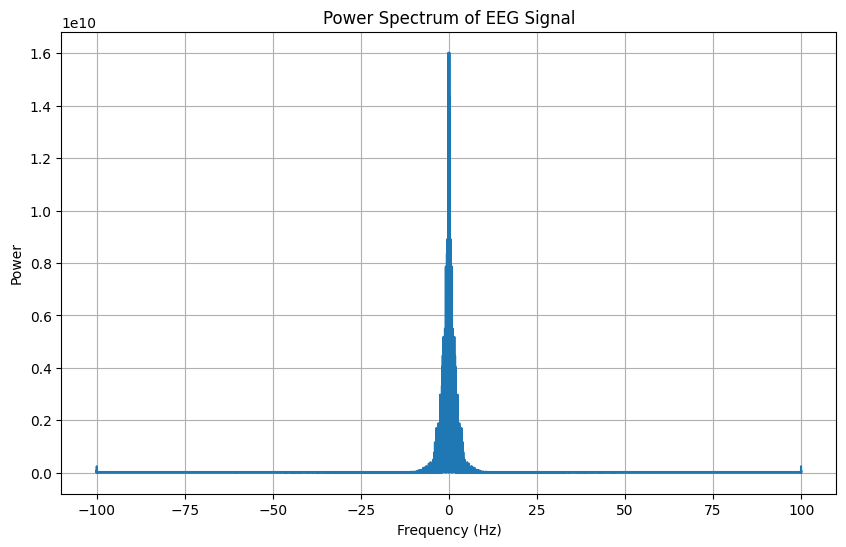

In [8]:
# Sampling rate
sampling_rate = 200  # Hz

# Compute FFT
fft_values = np.fft.fft(eeg_channel_data)
freqs = np.fft.fftfreq(len(fft_values), 1/sampling_rate)
power_spectrum = np.abs(fft_values)**2

# Plot the power spectrum
plt.figure(figsize=(10, 6))
plt.plot(freqs, power_spectrum)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.title('Power Spectrum of EEG Signal')
plt.grid()
plt.show()

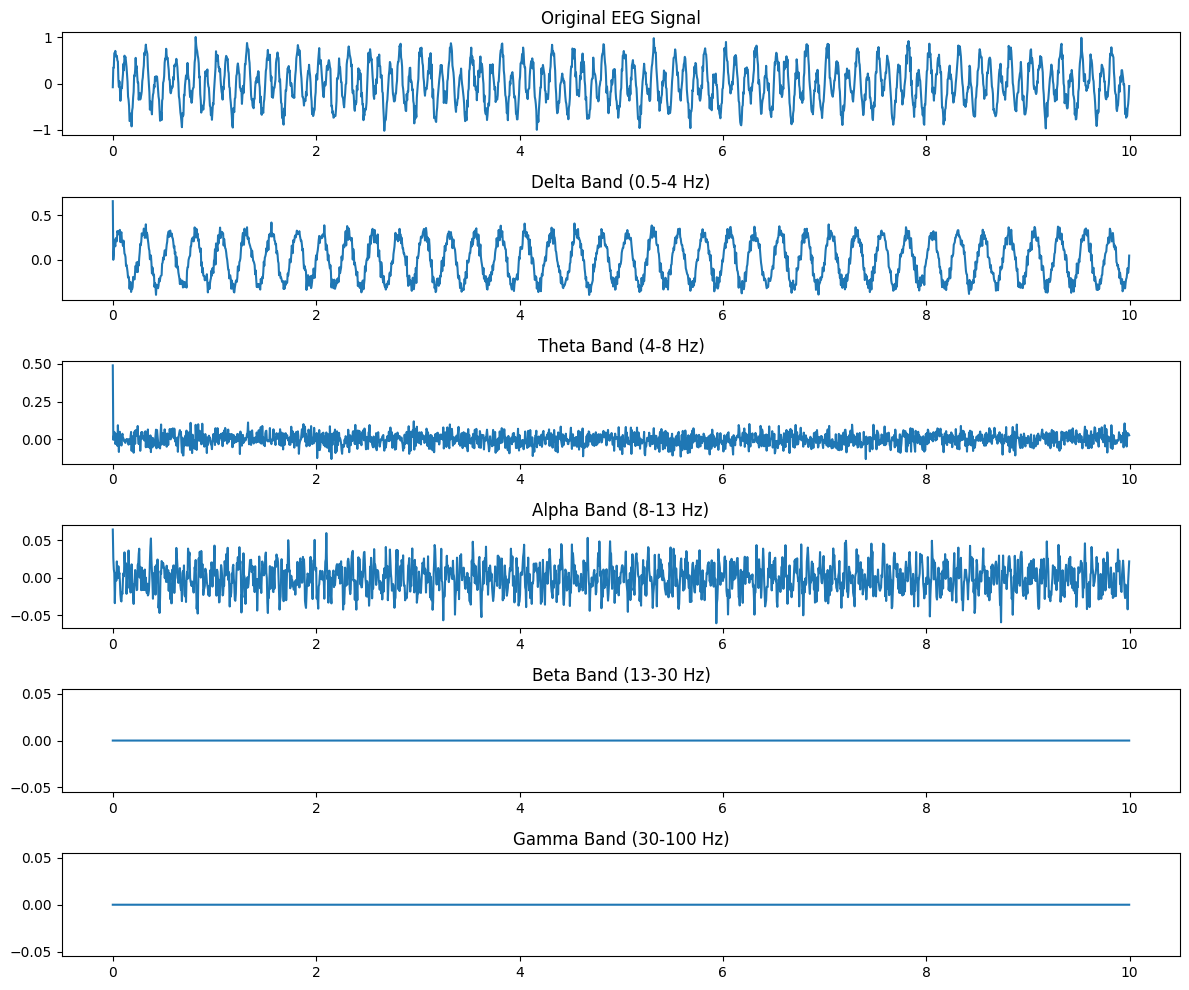

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

# Sample EEG data (replace this with your actual channel data)
sampling_rate = 200  # Sample rate in Hz
time = np.arange(0, 10, 1/sampling_rate)
channel_data = eeg_channel_data
channel_data = 0.5 * np.sin(2*np.pi*10*time) + 0.3 * np.sin(2*np.pi*4*time) + np.random.normal(0, 0.1, len(time))

# Apply FFT to convert to frequency domain
fft_data = fft(channel_data)

# Define frequency bands (in Hz)
frequency_bands = {
    'delta': (0.5, 4),
    'theta': (4, 8),
    'alpha': (8, 13),
    'beta': (13, 30),
    'gamma': (30, 100)
}

# Initialize a dictionary to store frequency components for each band
band_data = {}

# Separate frequency components for each band
for band_name, (min_freq, max_freq) in frequency_bands.items():
    band_indices = np.where((fft_data.real >= min_freq) & (fft_data.real <= max_freq))[0]
    band_data[band_name] = np.zeros(len(fft_data), dtype=np.complex128)
    band_data[band_name][band_indices] = fft_data[band_indices]

# Apply inverse FFT to convert back to time domain for each band
band_time_domain = {}
for band_name, band_fft_data in band_data.items():
    band_time_domain[band_name] = np.fft.ifft(band_fft_data).real

# Plot original and separated frequency bands
plt.figure(figsize=(12, 10))

plt.subplot(len(frequency_bands) + 1, 1, 1)
plt.plot(time, channel_data)
plt.title('Original EEG Signal')

for idx, (band_name, band_signal) in enumerate(band_time_domain.items()):
    plt.subplot(len(frequency_bands) + 1, 1, idx + 2)
    plt.plot(time, band_signal)
    plt.title(f'{band_name.capitalize()} Band ({frequency_bands[band_name][0]}-{frequency_bands[band_name][1]} Hz)')

plt.tight_layout()
plt.show()


In [14]:
#Exporting One channel in one trial to csv

import pandas as pd

# Replace 'eeg_channel_data' with the actual EEG data for one channel of 'djc_eeg1'
# Replace 'channel_index' with the index of the desired channel (0 for the first channel, 1 for the second channel, and so on)
eeg_channel_data = mat_data['djc_eeg1'][channel_index, :]

# Create a time vector for the x-axis (assuming a sampling rate of 200 Hz)
sampling_rate = 200
time_vector = np.arange(len(eeg_channel_data)) / sampling_rate

# Create a pandas DataFrame with time and EEG channel data
eeg_df = pd.DataFrame({'Time (seconds)': time_vector, 'EEG Channel Data': eeg_channel_data})

# Export the DataFrame to a CSV file
export_file_path = 'E:/STUDY/Publications/Thesis/Brain Emotion Detection/Practice/CSV/Preprocessed_EEG/1_Channel1_trial1.csv'  # Replace with your desired file path and name
eeg_df.to_csv(export_file_path, index=False)  # Set index=False to avoid writing the DataFrame index to the CSV file


In [15]:
# Assuming you have already loaded the EEG data for one trial (e.g., 'djc_eeg1')
# Replace 'eeg_trial_data' with the actual EEG data for the trial (e.g., 'djc_eeg1')

# Create a time vector for the x-axis (assuming a sampling rate of 200 Hz)
sampling_rate = 200
total_data_points = len(eeg_trial_data[0])
time_vector = np.arange(total_data_points) / sampling_rate

# Initialize an empty list to store DataFrames for each channel
dataframes_list = []

# Loop through all the channels and create a DataFrame for each channel
for channel_index in range(len(eeg_trial_data)):
    eeg_channel_data = eeg_trial_data[channel_index, :]
    channel_df = pd.DataFrame({'Time (seconds)': time_vector, f'EEG Channel {channel_index + 1} Data': eeg_channel_data})
    dataframes_list.append(channel_df)

# Concatenate all DataFrames into one DataFrame
eeg_all_channels_df = pd.concat(dataframes_list, axis=1)

# Export the DataFrame to a CSV file
export_file_path = 'E:/STUDY/Publications/Thesis/Brain Emotion Detection/Practice/CSV/Preprocessed_EEG/1_allchannel_trial1.csv'  # Replace with your desired file path and name
eeg_all_channels_df.to_csv(export_file_path, index=False)  # Set index=False to avoid writing the DataFrame index to the CSV file


In [ ]:
# Trial 1 all channels

# Create a time vector for the x-axis (assuming a sampling rate of 200 Hz)
sampling_rate = 200
total_data_points = len(eeg_trial_data[0])
time_vector = np.arange(total_data_points) / sampling_rate

# Initialize an empty DataFrame to store the data for all channels
eeg_all_channels_df = pd.DataFrame({'Time (seconds)': time_vector})

# Get the number of channels in the EEG data
num_channels = len(eeg_trial_data)

# Add each channel's data as a separate column in the DataFrame
for channel_index in range(num_channels):
    eeg_channel_data = eeg_trial_data[channel_index, :]
    eeg_all_channels_df[f'Channel {channel_index + 1}'] = eeg_channel_data

# Export the DataFrame to a CSV file
export_file_path = 'E:/STUDY/Publications/Thesis/Brain Emotion Detection/Practice/CSV/Preprocessed_EEG/1_trial1_allchannel.csv'  # Replace with your desired file path and name
eeg_all_channels_df.to_csv(export_file_path, index=False)  # Set index=False to avoid writing the DataFrame index to the CSV file


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already loaded the EEG data for one trial (e.g., 'djc_eeg1')
# Replace 'eeg_trial_data' with the actual EEG data for the trial (e.g., 'djc_eeg1')

# Create a time vector for the x-axis (assuming a sampling rate of 200 Hz)
sampling_rate = 200
total_data_points = len(eeg_trial_data[0])
time_vector = np.arange(total_data_points) / sampling_rate

# Get the number of channels in the EEG data
num_channels = len(eeg_trial_data)

# Number of rows and columns for subplots (you can adjust these based on your preference)
num_rows = 8
num_columns = 8

# Plot each channel's EEG data separately
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 15), sharex=True, sharey=True)

# Flatten the axes array to simplify indexing
axes_flat = axes.flatten()

# Loop through each channel and create a subplot for the EEG data
for channel_index in range(num_channels):
    eeg_channel_data = eeg_trial_data[channel_index, :]
    axes_flat[channel_index].plot(time_vector, eeg_channel_data)
    axes_flat[channel_index].set_title(f'Channel {channel_index + 1}')

# Set common labels for the entire figure
plt.xlabel('Time (seconds)')
plt.ylabel('EEG Amplitude')

# Adjust the layout and spacing of subplots
plt.tight_layout()

# Show the subplots
plt.show()


In [ ]:

# Loop through each trial and export the data to separate CSV files
for trial_index in range(1, 16):  # Assuming trial indices are from 1 to 15
    # Replace 'djc_eeg1' with the corresponding variable name containing EEG data for each trial
    variable_name = f'djc_eeg{trial_index}'
    eeg_data = mat_data[variable_name]

    # Create a time vector for the x-axis (assuming a sampling rate of 200 Hz)
    sampling_rate = 200
    total_data_points = len(eeg_data[0])
    time_vector = np.arange(total_data_points) / sampling_rate

    # Initialize a DataFrame to store the data for all channels in this trial
    trial_data_df = pd.DataFrame({'Time (seconds)': time_vector})

    # Loop through each channel and add its data to the DataFrame
    for channel_index in range(len(eeg_data)):
        channel_name = f'Channel {channel_index + 1}'  # Replace with your desired channel naming convention
        trial_data_df[channel_name] = eeg_data[channel_index]

    # Export the DataFrame to a CSV file with a unique name for each trial
    export_file_path = f'E:/STUDY/Publications/Thesis/Brain Emotion Detection/Practice/CSV/Preprocessed_EEG/1_20131027/djc_eeg{trial_index}.csv'  # Replace with your desired file path and name
    trial_data_df.to_csv(export_file_path, index=False)  # Set index=False to avoid writing the DataFrame index to the CSV file


With ExtractedFeature